In [1]:
from PIL import Image
import os
import numpy as np

In [2]:
data_dir = "./images"
files = os.listdir(data_dir)

images = []

for file in files:
    path = os.path.join(data_dir, file)
    images.append(np.array(Image.open(path)))

In [3]:
import tensorflow as tf

resized_images = np.array(np.zeros((len(images), 224, 224, 3)))
for i in range(len(images)):
    resized_images[i] = tf.image.resize(images[i], [224, 224])

preprocessed_images = tf.keras.applications.mobilenet_v2.preprocess_input(resized_images)

In [4]:
mobilenet_imagenet_model = tf.keras.applications.MobileNetV2(weights="imagenet")

y_pred = mobilenet_imagenet_model.predict(preprocessed_images)
topK = 1
y_pred_top = tf.keras.applications.mobilenet_v2.decode_predictions(y_pred, top=topK)

35363/35363 [==============================] - 0s 7us/step


In [5]:
y_pred.shape

(5, 1000)

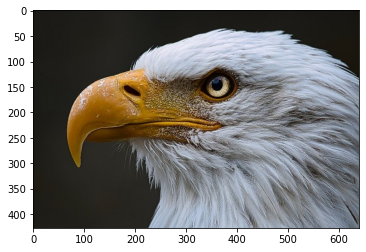

bald_eagle (67.9%)


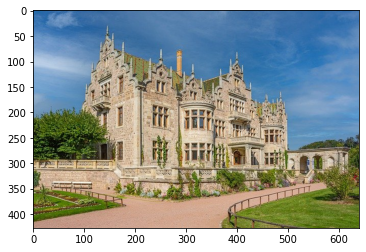

castle (81.5%)


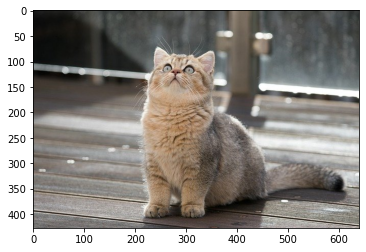

tiger_cat (34.7%)


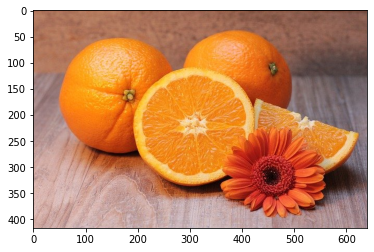

orange (97.1%)


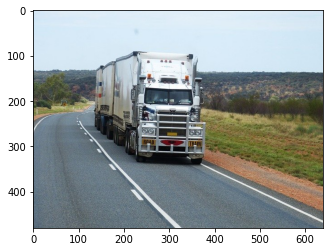

trailer_truck (52.4%)


In [6]:
from matplotlib import pyplot as plt
import numpy as np

for i in range(len(images)):
    plt.imshow(images[i])
    plt.show()

    for k in range(topK):
        print(f'{y_pred_top[i][k][1]} ({round(y_pred_top[i][k][2] * 100, 1)}%)')